In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')



df=pd.read_csv('/content/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df.drop(['Unnamed: 0','Date'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))


In [ ]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


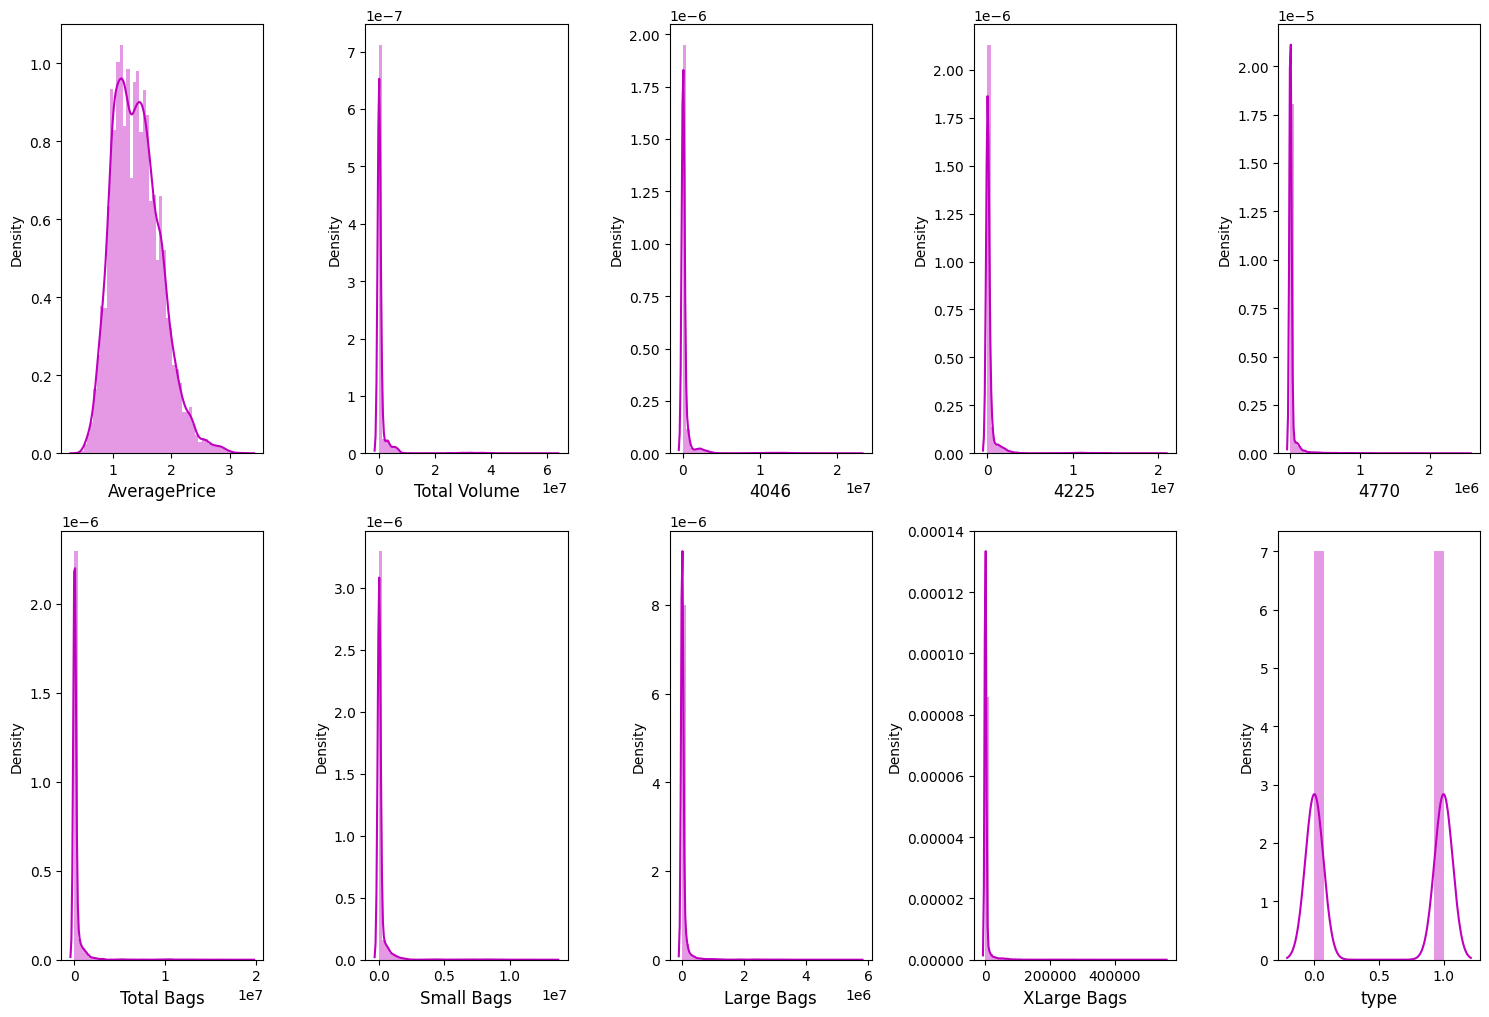

In [ ]:
plt.figure(figsize=(15,25), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1

plt.tight_layout()

#by distplot we can observe skwness in data

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns
skewness_threshold = 0.5  # You can adjust this threshold as needed

# Apply cube root transformation to columns with skewness above the threshold
for col in numeric_columns:
    if df[col].skew() > skewness_threshold:
        df[col] = np.cbrt(df[col])

# You can check the skewness after the transformation
skewness_after = df[numeric_columns].apply(lambda x: x.skew())
print("Skewness after transformation:")
print(skewness_after)

Skewness after transformation:
AveragePrice    0.070540
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.215339
region          0.000030
dtype: float64


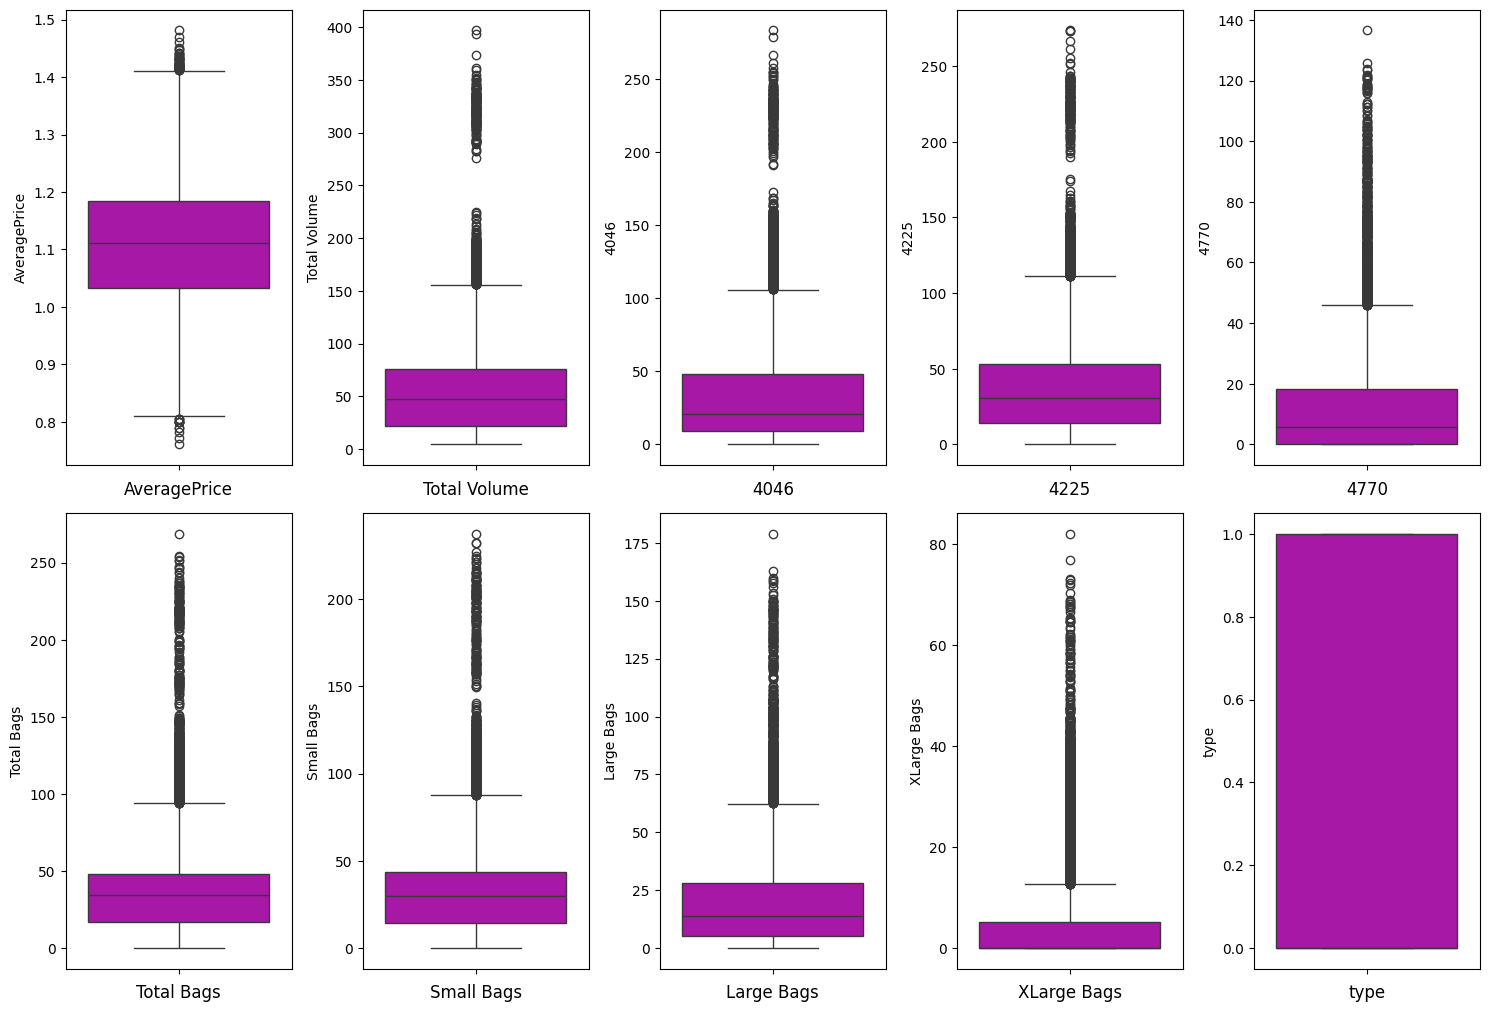

In [ ]:
plt.figure(figsize=(15,25), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1

plt.tight_layout()

#not any outlier is present in graph

In [ ]:
from scipy.stats import zscore
out_features=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(out_features))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.097915,0.373714,0.659077,0.034740,0.516446,0.598284,0.499147,0.726623,0.497449
1,0.046378,0.416209,0.695853,0.104144,0.502067,0.578275,0.477634,0.723402,0.497449
2,1.259476,0.186355,0.682425,0.247649,0.430509,0.612653,0.514969,0.719251,0.497449
3,0.790757,0.314419,0.650891,0.070758,0.484502,0.681931,0.591191,0.699057,0.497449
4,0.229057,0.435033,0.667781,0.110236,0.480881,0.669753,0.580158,0.665220,0.497449
...,...,...,...,...,...,...,...,...,...
18244,0.626955,0.670393,0.589007,0.788271,0.734478,0.493306,0.392824,0.582767,0.497449
18245,0.804977,0.705946,0.645993,0.686526,0.734478,0.584109,0.489994,0.615341,0.497449
18246,1.145016,0.707402,0.645975,0.732143,0.195392,0.580964,0.479098,0.776582,0.497449
18247,1.267521,0.679622,0.621105,0.706268,0.195622,0.544766,0.440319,0.767092,0.497449


In [ ]:
df1=df[(z<3).all(axis=1)]
df1.shape

(17319, 12)

In [ ]:
df=df1

In [ ]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.544913,-0.562379,-0.428675,-0.462111,-0.517177,-0.464750,-0.458355,-0.300199,0.610670,0.098246,0.009070
Total Volume,-0.544913,1.000000,0.889724,0.933782,0.766873,0.947019,0.930990,0.708656,0.565688,-0.737030,0.034551,0.072469
4046,-0.562379,0.889724,1.000000,0.713163,0.671533,0.810128,0.791762,0.645666,0.510348,-0.663325,-0.019032,0.155083
4225,-0.428675,0.933782,0.713163,1.000000,0.750634,0.846317,0.842840,0.590895,0.513164,-0.698331,-0.026141,0.021925
4770,-0.462111,0.766873,0.671533,0.750634,1.000000,0.682142,0.690955,0.451839,0.558255,-0.653713,-0.105627,-0.026123
Total Bags,-0.517177,0.947019,0.810128,0.846317,0.682142,1.000000,0.968493,0.776902,0.558874,-0.670585,0.173660,0.085195
Small Bags,-0.464750,0.930990,0.791762,0.842840,0.690955,0.968493,1.000000,0.621946,0.558130,-0.671441,0.152941,0.074522
Large Bags,-0.458355,0.708656,0.645666,0.590895,0.451839,0.776902,0.621946,1.000000,0.382806,-0.464999,0.181198,0.104580
XLarge Bags,-0.300199,0.565688,0.510348,0.513164,0.558255,0.558874,0.558130,0.382806,1.000000,-0.532907,0.144314,-0.041110
type,0.610670,-0.737030,-0.663325,-0.698331,-0.653713,-0.670585,-0.671441,-0.464999,-0.532907,1.000000,0.010254,0.024457


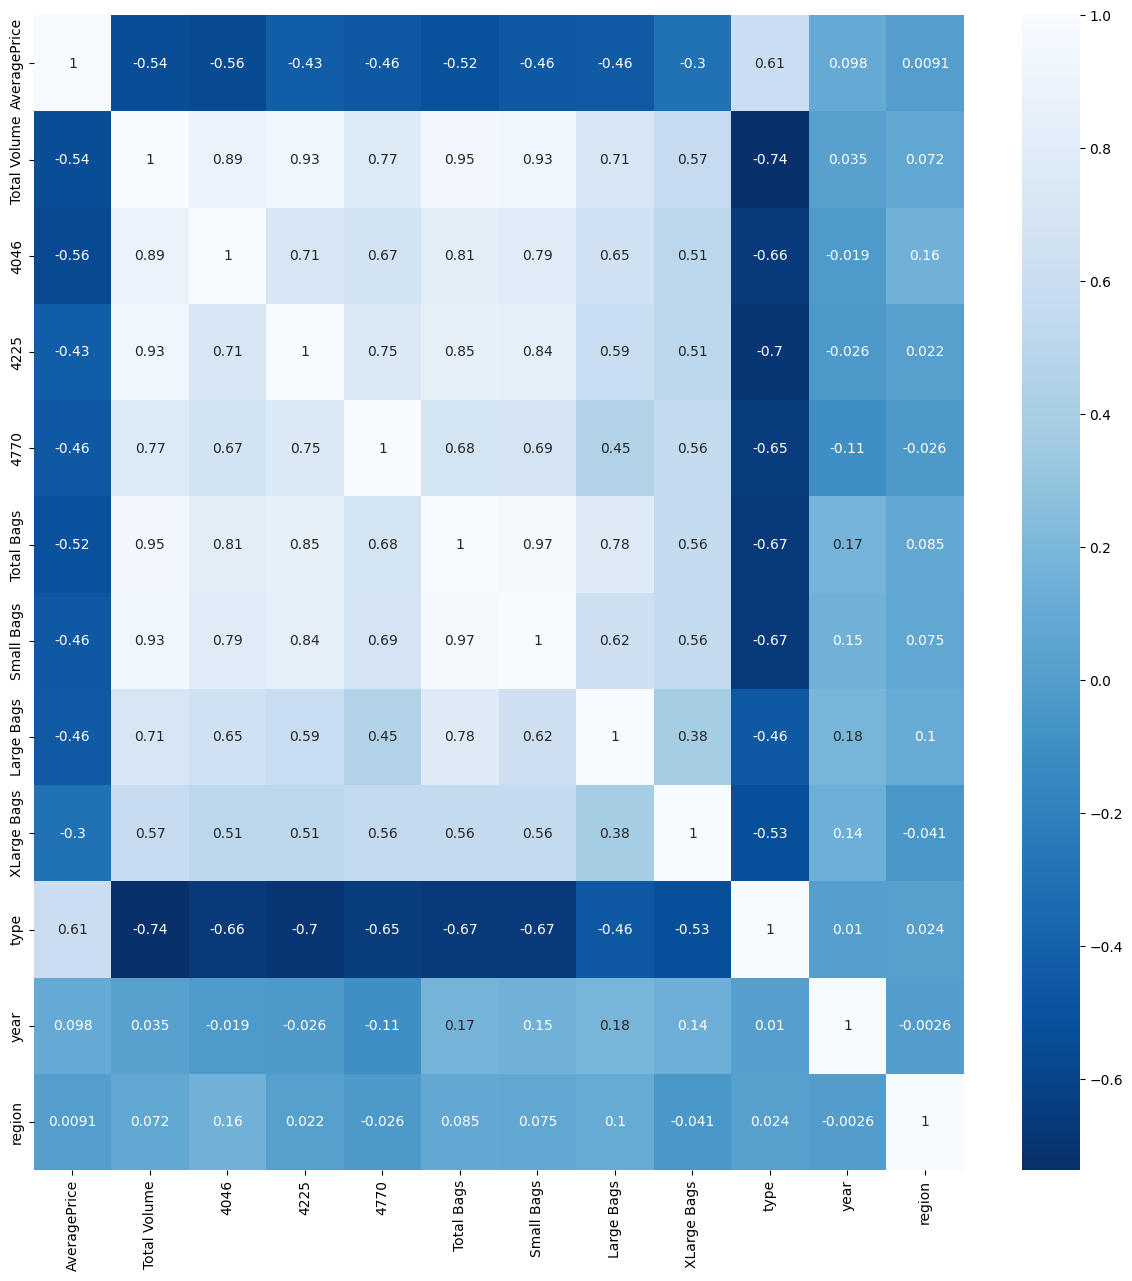

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="Blues_r")
plt.show()

In [ ]:
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif =pd.DataFrame()
vif["VIF Values"]= [variance_inflation_factor(x.values,i)for i in range (len(x.columns))]

vif

,VIF Values
0,172.179279
1,21.088745
2,35.023218
3,2.920452
4,101.122560
5,53.956493
6,8.601465
7,1.717520
8,2.401140
9,1.309479


In [ ]:
df.drop('Total Volume',axis=1,inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics  import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
lr=LinearRegression()
RFR=RandomForestRegressor()
DTC=DecisionTreeClassifier()
knn=KNN()
las =Lasso()
rid=Ridge()

model=[lr,RFR,knn,las,rid]

for m in model:

  m.fit(x_train,y_train)
  m.score(x_train,y_train)
  predm=m.predict(x_test)
  print("r2_score",m,"is")
  print(r2_score(y_test,predm)*100)
  print(mean_absolute_error(y_test,predm))
  print(mean_squared_error(y_test,predm))
  print('\n')

r2_score LinearRegression() is
51.45727300609144
0.05729939198157532
0.0053150463706249035


r2_score RandomForestRegressor() is
83.6781721227677
0.030013062771158564
0.0017871116311972744


r2_score KNeighborsRegressor() is
84.12240527997444
0.02978685963201127
0.0017384715984644775


r2_score Lasso() is
-0.0022090742506364336
0.08541437927728011
0.01094945445609734


r2_score Ridge() is
51.452600159838234
0.05729725678199625
0.005315558010494698




In [ ]:
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
RFR=RandomForestRegressor()
DTC=DecisionTreeClassifier()
knn=KNN()
las =Lasso()
rid=Ridge()

model = [lr,RFR,knn,las,rid]

for i in model:
  i.fit(x_train,y_train)
  score = cross_val_score(i, x, y)
  print(score)
  print(score.mean())

  # Make predictions on the test set
  pred = i.predict(x_test)

  # Calculate and print the difference between accuracy on test set and cross-validation mean
  print("Difference for", i, "model:", r2_score(y_test, pred) - score.mean())
  print('\n')


[0.0557415  0.21095703 0.37446551 0.17313555 0.1729203 ]
0.1974439761880959
Difference for LinearRegression() model: 0.3171287538728185


[0.30358514 0.26046287 0.59025483 0.30840274 0.05513234]
0.30356758294668273
Difference for RandomForestRegressor() model: 0.534685826923441


[-0.10925269  0.31514801  0.38292694  0.2143758   0.06575127]
0.17378986684733125
Difference for KNeighborsRegressor() model: 0.6674341859524132


[-2.77968598 -0.62697976 -0.11595932 -0.44729902 -0.87742103]
-0.9694690231702465
Difference for Lasso() model: 0.9694469324277402


[0.05512969 0.21096484 0.37454988 0.17274466 0.17238567]
0.1971549494042504
Difference for Ridge() model: 0.317371052194132




In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'fit_intercept': [True, False],

}

In [ ]:
GCV=GridSearchCV(LinearRegression(),param_grid,cv=5)

In [ ]:
GCV.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [ ]:
GCV.best_params_


{'fit_intercept': True}

In [ ]:
Final_model = LinearRegression(fit_intercept = True)

In [ ]:
import joblib
joblib.dump(Final_model,'Avacoda_price.pkl')

['Avacoda_price.pkl']

In [ ]:
model=joblib.load('Avacoda_price.pkl')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Assuming you have already created an instance of ExtraTreesClassifier, e.g., model = ExtraTreesClassifier()
model.fit(x_train, y_train)  # Make sure to replace x_train and y_train with your actual training data

# Now you can make predictions
predictions = model.predict(x_test)  # Replace x_test with your actual test data


In [ ]:
a=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['predicted']= predictions
df_pred['original']=a
df_pred

,predicted,original
0,1.020946,0.996655
1,1.171606,1.159778
2,1.002620,1.121346
3,0.920035,1.050718
4,1.210742,1.214184
...,...,...
5191,1.197130,1.152295
5192,1.168334,1.116019
5193,1.103740,1.126623
5194,1.045105,1.139604
